# 1. Theoretical background of Crowdfunding and Alternative Finance



The **objective** of this project is to predict the success of Kickstarter campaigns. A campaign is considered successful if it meets or exceeds its funding goal by the deadline. To achieve this, we will explore various features of Kickstarter campaigns and use them to build a predictive model. The dataset is divided into training and testing sets.
In the context of a Kickstarter campaign, success is defined primarily from the start of financial stability (goal) to the limited data (deadline).
Successful: The campaign is considered successful (state = 'successful') and has been successful if it is limited to the specific nature of its objective (goal) but may not be limited to data.  
Failed: The campaign is considered to be in effect (state = 'failed') but has received no data limits.  

**Crowdfunding** is the *intermediation* of products, services and investment opportunities, primarily though a *digital platform*. The platform ensures that the crowdfunding project functions according to specific, *pre-defined rules*, which often invole a pre-set target goal, a pre-set campaign time and pre-set rules which clarify if a project is successful.

The following graphs are from this Guidebook:
*Wenzlaff, K., & Gumpelmaier, W. (2018). The (almost) complete Guidebook to Crowdfunding for SMEs. Ikosom UG/CrowdfundPort. https://www.crowdcreator.eu/crowdfunding-guide-book/*

https://www.crowdcreator.eu/crowdfunding-infographics/

There are more than 20.000 academic papers on Kickstarter success, due to three factors:

- Availability of the data (through webscraping and data portals)
- (Global) Scale of the platform
- Usage as a proxy in entrepreneurial finance

Most academic papers use simple regression methods to analyse the Kickstarter data, thus creating substantial methodological problems:
- Do not take into account cultural differences between countries (for instance trust in public institutions influences kickstarter success).
- Do not take into account data which is difficult to obtain, such as the social capital / the social network of project owners, which are highly relevant for the campaign.
- Do not take into account local platforms, which are in competition to Kickstarter (local bias of supporters).
- Do not take into account the substantial differences between categories.

The features most used in Kickstarter-Analysis are:
- Target goal
- Number of rewards
- Price of rewards
- Length of the campaign
- Place of the campaign
- Number of backers
- Number of social media fans of the project owner
- Number of updates on the blog
- Semantic analysis of the text
- Content analysis of the video
- Emotional analysis of the provided infographics

The focus on this project will be on building the ML model to predict success or failure.   Potential hypothesis to test: ML models trained with data from different periods like compare covid-19 crowdfunding success predictive models against other periods.





# 2. Project setup

In [ ]:
# Load the Libraries
import pandas as pd
import numpy as np
from scipy import stats

from io import BytesIO
from zipfile import ZipFile
import requests

import re
from datetime import datetime

from google.colab import data_table

!pip install plotly
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

import re

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense

The code snippet provided is a setup section typically found at the beginning of a data analysis or data science notebook in Python, specifically tailored for an environment like Google Colab. Here’s a brief explanation of what each part of the code does:

**Data manipulation:**  
*   **pandas**: A powerful data manipulation and analysis library for Python. It provides data structures and operations for manipulating numerical tables and time series.

*   **numpy**: Stands for Numerical Python and is the core library for numeric and scientific computing. It provides support for arrays, matrices, and high-level mathematical functions.

*   **scipy.stats:** Part of SciPy, a scientific computing library. This submodule specifically provides a large number of probability distributions as well as a growing library of statistical functions.

**I/O and Web Handling:**
*   **BytesIO:** Allows for reading and writing binary data in memory using file-like semantics.
*   **ZipFile:** A module to work with ZIP archives. It allows you to extract files from a ZIP archive or create your own ZIP archive.

*   **requests**: A simple, yet powerful, library for making HTTP requests. This can be  used to download data or interact with APIs over the Internet.

**Date and Regular Expressions:**

*   **re:** Stands for Regular Expression, used for searching text for strings or patterns.  
*   **datetime:** A module to work with dates and times. It supports operations like parsing dates from strings, formatting dates to strings, and manipulating dates and times.  

**Enhanced Data Viewing in Colab:**  
*   **from google.colab import data_table:** Activates an interactive table view for pandas DataFrames in Google Colab, making it easier to explore data directly within the notebook.

**Plotting:**

*   **!pip install plotly:** This line installs Plotly, a library used for creating interactive plots. The exclamation mark ! is used in Colab to run shell commands.  
*   **plotly.express:** The express module of Plotly which provides a simple syntax for complex charts.  
*   **seaborn:** Python library based on matplotlib that provides a high-level interface for drawing attractive and informative statistical graphics.  
*   **matplotlib.pyplot:** A state-based interface to matplotlib intended for interactive plots and simple cases of programmatic plot generation.  

**Data modelling:**  
*   **sklearn.model_selection import train_test_split:**  Split arrays or matrices into random train and test subsets.  
*   **sklearn.preprocessing import LabelEncoder:**  Encodes target labels with value between 0 and n_classes-1.  
*  **sklearn.preprocessing import StandardScaler:** Standardizes features by removing the mean and scaling to unit variance.  
*   **sklearn.svm import SVC:**  Sklearn's class for C-Support Vector Classification based on libsvm.  
*   **sklearn.linear_model import LogisticRegression:**  Sklearn's class for Logistic Regression.  
*   **sklearn.ensemble import RandomForestClassifier:**  Sklearn's class for Random Forest Classification.  
*   **sklearn.metrics import confusion_matrix:** Computes the confusion matrix to evaluate the accuracy of a classification.  
*   **sklearn.metrics import classification_report:** Builds a text report showing the main classification metrics.  
*   **sklearn.metrics import accuracy_score:** Computes he Accuracy classification score for all labels predicted.  
*   **tensorflow.keras.models import Sequential:** Tensorflow's class for a Sequential model for a plain stack of layers where each layer has exactly one input tensor and one output tensor.  
*   **tensorflow.keras.models import load_model:** Loads a model saved via model.save().  
*   **tensorflow.keras.layers import Dense:**  Tenserflow's class for a regular densely-connected NN layer.  

 *This setup is typical for data analysis projects where data may need to be downloaded, processed, and visualized. The combination of these libraries and modules prepares a robust environment for handling a wide array of data science tasks in Google Colab.*

# 3. Data gathering

The code snippet is designed to download and process all .csv files contained within a specific ZIP archive hosted online.
**This example targets a ZIP file from the Kickstarter datasets available on the Web Robots website, specifically for the date April 15, 2024.**

Here's a breakdown of the code's functionality:

1. **Importing Necessary Libraries:** The code imports libraries for handling HTTP requests (requests), reading from ZIP files (ZipFile), managing file-like objects (BytesIO), data manipulation (pandas), regular expressions (re), and date and time (datetime).
2.**Setting the URL and File Extension:** The URL of the ZIP file containing the Kickstarter datasets is defined, along with the .csv file extension to identify which files within the ZIP to process.
3. **Downloading and Accessing the ZIP File:** The ZIP file is retrieved from the specified URL using requests.get(), and it is made accessible as a file-like object in memory via BytesIO.
4. **Extracting CSV Files:** The code lists all files ending with .csv from the ZIP archive. This list will be used to load the individual CSV files.
5. **Reading and Concatenating Data**: Each CSV file is read into a separate DataFrame. During this process, the code also extracts the publishing date from the ZIP file's name using a regular expression, converts it into a datetime object, and appends it as a new column in each DataFrame. This helps in tracking when the data was published.
6. **Combining DataFrames:** All individual DataFrames are concatenated into a single DataFrame, creating a unified dataset that includes all data from the CSV files within the ZIP archive.

This approach is particularly useful for handling and analyzing large datasets distributed across multiple files in a compressed format, allowing for efficient data processing and manipulation

In [ ]:
# Read all csv files published under one zip from webrobots https://webrobots.io/kickstarter-datasets/
url = "https://s3.amazonaws.com/weruns/forfun/Kickstarter/Kickstarter_2024-04-15T06_47_07_694Z.zip" # This dataset corresponds to 2024-04-15
extension = ".csv"

content = requests.get(url)
zf = ZipFile(BytesIO(content.content))
csv_files = [file for file in zf.namelist()  if file.endswith(extension)]

dfs = []
data_publishing_date = re.findall(r'20.*Z', url)[0]
data_publishing_date = datetime.strptime(data_publishing_date, "%Y-%m-%dT%H_%M_%S_%fZ")
for csv_file in csv_files:
    df = pd.read_csv(zf.open(csv_file), low_memory=False)
    df['data_publishing_date'] = data_publishing_date
    dfs.append(df)
kickstarter_df = pd.concat(dfs, ignore_index=True)

In [ ]:
kickstarter_df.shape

(241369, 42)

# 4. Data preprocessing

**Data preprocessing** is a critical step in the data science workflow. It involves transforming raw data into a clean dataset that can be used for analysis and modeling.  

**Steps in Data Preprocessing**
1. **Loading Data:** Before preprocessing, the data must be loaded into the environment. This often involves reading files (e.g., CSV, JSON) into data structures like DataFrames.
2. **Handling Missing Values:**

  2.1. **Identifying Missing Values:** Detect missing values within the dataset. This can be done using methods like DataFrame.isnull() in pandas.

  2.2. **Imputing Missing Values:** Fill missing values using various strategies such as replacing them with the mean/median/mode of the column, using a constant, or applying more complex algorithms like k-Nearest Neighbors for imputation.
  2.3. Dropping Missing Values: Alternatively, rows or columns with a high percentage of missing values can be dropped.
3.**Data Cleaning:**

   3.1. **Removing Duplicates:** Check for and remove duplicate records that might skew the analysis.
   3.2. **Filtering Data:** Exclude data that doesn't meet certain criteria necessary for the analysis.
4.**Correcting Errors:** Identify and correct errors in the data (e.g., typographical errors, incorrect data entries).
5. **Data Transformation:**

   5.1.**Normalization and Scaling:** Scale features to a uniform scale if required by the model, using methods like Min-Max Scaling, Standardization, or Robust Scaling.

  5.2. **Data Encoding:** Convert categorical data into numeric formats using techniques like one-hot encoding, label encoding, or using binary variables.

  5.3.**Feature Engineering:**Create new relevant features from existing data to improve model performance or provide clearer insights.
6.**Data Reduction:**
Dimensionality Reduction: Apply techniques like PCA (Principal Component Analysis) to reduce the number of features while retaining essential information.
7. **Aggregation:** Aggregate data for better understanding or to simplify analysis, such as summarizing time-series data into higher time frames.
8. **Handling Outliers:**

 8.1.**Detection**: Identify outliers using statistical methods (e.g., Z-score, IQR) or visualization tools (e.g., box plots).

 8.2.**Treatment**: Decide whether to cap, remove, or correct outliers depending on their cause and impact on the analysis.
9. **Time-Series Specific Processing (if applicable):**

   9.1.**Date Parsing and Formatting:** Convert date/time columns into a DateTime format that's easier to work with in analyses.

  9.2.**Handling Seasonality and Trends:** Decompose time-series data to understand underlying patterns.
10. **Validation of Data Preprocessing:**
    
    **Sanity Checks:** Perform checks to ensure that the preprocessing steps have been applied correctly.
11. **Visualization:** Use plots and charts to visualize the preprocessed data and ensure everything appears as expected.

In [ ]:
# Transform timestamp columns
kickstarter_df['created_at'] = pd.to_datetime(kickstarter_df['created_at'],unit='s')
kickstarter_df['deadline'] = pd.to_datetime(kickstarter_df['deadline'],unit='s')
kickstarter_df['launched_at'] = pd.to_datetime(kickstarter_df['launched_at'],unit='s')
kickstarter_df['state_changed_at'] = pd.to_datetime(kickstarter_df['state_changed_at'],unit='s')
kickstarter_df['data_publishing_date'] = pd.to_datetime(kickstarter_df['data_publishing_date'])

In [ ]:
def get_summary(df):
  print(f"Dataset Shape: {df.shape}")
  summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
  summary = summary.reset_index()
  summary['Name'] = summary['index']
  summary = summary[['Name','dtypes']]
  summary['Missing'] = df.isnull().sum().values
  summary['Uniques'] = df.nunique().values
  # summary['Mode'] = df.mode(axis='columns', dropna=False).values

  for name in summary['Name'].value_counts().index:
      summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2) # a random variable's entropy reflects the average uncertainty
  summary.to_csv('kickstarter_summary.csv', index=False)
  return summary

In [ ]:
get_summary(kickstarter_df)

Dataset Shape: (241369, 42)


Name          dtypes  Missing  Uniques  Entropy
0              backers_count           int64        0     3274     7.37
1                      blurb          object       14   208206    17.60
2                   category          object        0      171     6.98
3   converted_pledged_amount         float64    10304    36370    12.66
4                    country          object        0       25     2.14
5   country_displayable_name          object        0       25     2.14
6                 created_at  datetime64[ns]        0   210270    17.62
7                    creator          object        0   240418    17.87
8                   currency          object        0       15     1.87
9            currency_symbol          object        0        7     1.14
10    currency_trailing_code            bool        0        2     0.76
11          current_currency          object        0        4     0.01
12                  deadline  datetime64[ns]        0   194317    17.02
13     disable_communication            bool        0        2     0.00
14                   fx_rate         float64        0       32     1.87
15                      goal         float64        0     6628     6.81
16                        id           int64        0   210359    17.62
17               is_disliked            bool        0        1     0.00
18               is_launched            bool        0        2     0.25
19                  is_liked            bool        0        1     0.00
20              is_starrable            bool        0        2     0.35
21               launched_at  datetime64[ns]        0   204538    17.09
22                  location          object      180    17481     9.88
23                      name          object        0   209633    17.62
24            percent_funded         float64        0    93376    14.00
25                     photo          object        0   210264    17.62
26                   pledged         float64        0    54609    12.70
27       prelaunch_activated            bool        0        2     0.82
28                   profile          object        0   210364    17.62
29                      slug          object        0   210359    17.62
30                source_url          object        0      171     7.10
31                 spotlight            bool        0        2     0.99
32                staff_pick            bool        0        2     0.61
33                     state          object        0        7     1.51
34          state_changed_at  datetime64[ns]        0   200525    17.51
35           static_usd_rate         float64        0    19811     5.65
36                      urls          object        0   210359    17.62
37         usd_exchange_rate         float64    10304    19869     5.59
38               usd_pledged         float64    10304   100344    14.54
39                  usd_type          object      156        1     0.00
40                     video          object    87531   136624    17.01
41      data_publishing_date  datetime64[ns]        0        1     0.00

In [ ]:
# Turn the video column into a bool: if video then True, else False
kickstarter_df['video'] = kickstarter_df['video'].map(lambda x: True if x else False)
kickstarter_df['video'].head(2)

0    True
1    True
Name: video, dtype: bool

In [ ]:
# Slice the source url to only contain the category
kickstarter_df['source_url'] = kickstarter_df['source_url'].str.slice(start=48)# extract urla start on 48 rows for fixed the categories
kickstarter_df['source_url'].head(2)

0    fashion/footwear
1    fashion/footwear
Name: source_url, dtype: object

In [ ]:
# Drop columns that are irrelevant
kickstarter_df.drop(columns=['photo', 'urls'], inplace=True)# drop 2 coloane photo and  urls
kickstarter_df.shape

(241369, 40)

In [ ]:
# Explode nested columns
kickstarter_df[['category', 'creator', 'location', 'profile', 'id']].head()

category  \
0  {"id":266,"name":"Footwear","analytics_name":"...   
1  {"id":266,"name":"Footwear","analytics_name":"...   
2  {"id":266,"name":"Footwear","analytics_name":"...   
3  {"id":332,"name":"Apps","analytics_name":"Apps...   
4  {"id":332,"name":"Apps","analytics_name":"Apps...   

                                             creator  \
0  {"id":585725363,"name":"Odd Sock Mob","slug":"...   
1  {"id":1996757307,"name":"Don Miclette (deleted...   
2  {"id":302491220,"name":"Khyber Sole (deleted)"...   
3  {"id":1171759321,"name":"Kayla Fotta","slug":"...   
4  {"id":1951822929,"name":"Catherine","is_regist...   

                                            location  \
0  {"id":1105779,"name":"Sydney","slug":"sydney-a...   
1  {"id":2406953,"name":"Franklin","slug":"frankl...   
2  {"id":2211344,"name":"Peshawar","slug":"peshaw...   
3  {"id":2459115,"name":"New York","slug":"new-yo...   
4  {"id":2369930,"name":"Brookline","slug":"brook...   

                                             profile          id  
0  {"id":3825612,"project_id":3825612,"state":"in...  1001145960  
1  {"id":3810995,"project_id":3810995,"state":"in...   975609282  
2  {"id":3742997,"project_id":3742997,"state":"in...  1572423819  
3  {"id":4402159,"project_id":4402159,"state":"in...   519690402  
4  {"id":4377218,"project_id":4377218,"state":"in...   991220156

In [ ]:
# Explode nested column category
kickstarter_df = pd.concat([kickstarter_df.drop(['category'], axis=1), kickstarter_df['category'].apply(eval).apply(pd.Series).rename(
    columns={'id': 'category_id', 'name': 'category_name', 'analytics_name': 'category_analytics_name', 'slug': 'category_slug',
             'position': 'category_position', 'parent_id': 'category_parent_id', 'parent_name': 'category_parent_name',
             'color': 'category_color', 'urls': 'category_urls'})], axis=1)

In [ ]:
kickstarter_df.shape

(241369, 48)

In [ ]:
kickstarter_df.drop(columns=['category_urls'], inplace=True)
kickstarter_df.head(2)
# Treat non-unique instances
kickstarter_df.loc[kickstarter_df['id'] ==1514250802][['created_at', 'deadline','launched_at', 'state_changed_at']]
# Dates are not uptdated, we'll drop all duplicates based on their index (last index being the most recent)
kickstarter_df = kickstarter_df.drop_duplicates('id',keep='last')
kickstarter_df.shape

(210359, 47)

In [ ]:
# Filter by Failed or Successful projects
kickstarter_df = kickstarter_df.loc[kickstarter_df['state'].isin(['failed','successful'])]
kickstarter_df.head(2)

backers_count                                              blurb  \
3              2  We've modernized old school video dating to gi...   
4              1  An innovative dating app that facilitates real...   

   converted_pledged_amount country country_displayable_name  \
3                       3.0      US        the United States   
4                       1.0      US        the United States   

           created_at                                            creator  \
3 2022-05-08 10:29:15  {"id":1171759321,"name":"Kayla Fotta","slug":"...   
4 2022-03-27 17:20:03  {"id":1951822929,"name":"Catherine","is_regist...   

  currency currency_symbol  currency_trailing_code  ... video  \
3      USD               $                    True  ...  True   
4      USD               $                    True  ...  True   

     data_publishing_date  category_id  category_name  \
3 2024-04-15 06:47:07.694          332           Apps   
4 2024-04-15 06:47:07.694          332           Apps   

   category_analytics_name    category_slug  category_position  \
3                     Apps  technology/apps                  2   
4                     Apps  technology/apps                  2   

   category_parent_id  category_parent_name  category_color  
3                16.0            Technology         6526716  
4                16.0            Technology         6526716  

[2 rows x 47 columns]

In [ ]:
kickstarter_df.shape

(192128, 47)

# 5. Data visualization (EDA)

Prior to proceeding to apply modeling for predicting successful vs unsucessful campaigns, its is important to perform Exploratory Data Analysis (EDA) enhanced by visuals to understand the problem at hand and how the predictor variables relate to the target variable.
Such an exploration allows Data Scientists to decide, for example, whether feature engineering is necessary for improving model performance.

If you want to know more about the libraries here presented for visual EDA, please visit the following resources:



*   Iteractive data tables: https://colab.research.google.com/notebooks/data_table.ipynb

*   Interactive (html) plots with Plotly: https://plotly.com/python/



In [ ]:
kickstarter_df['creator'] = kickstarter_df['creator'].apply(lambda x: re.search(r'"id":(\d+)', x).group(1))
kickstarter_df['creator'].head()

3    1171759321
4    1951822929
5    1480045737
6    1585884351
7    1451850671
Name: creator, dtype: object

In [ ]:
# let's check again the summary of the data to see variables and their types after all preprocessing
get_summary(kickstarter_df)

Dataset Shape: (192128, 47)


Name          dtypes  Missing  Uniques  Entropy
0              backers_count           int64        0     3234     7.51
1                      blurb          object        4   190567    17.53
2   converted_pledged_amount         float64        0    35823    12.63
3                    country          object        0       25     2.06
4   country_displayable_name          object        0       25     2.06
5                 created_at  datetime64[ns]        0   192060    17.55
6                    creator          object        0   162250    17.13
7                   currency          object        0       15     1.80
8            currency_symbol          object        0        7     1.10
9     currency_trailing_code            bool        0        2     0.74
10          current_currency          object        0        1     0.00
11                  deadline  datetime64[ns]        0   182135    17.43
12     disable_communication            bool        0        1     0.00
13                   fx_rate         float64        0       15     1.80
14                      goal         float64        0     6299     6.83
15                        id           int64        0   192128    17.55
16               is_disliked            bool        0        1     0.00
17               is_launched            bool        0        1     0.00
18                  is_liked            bool        0        1     0.00
19              is_starrable            bool        0        1     0.00
20               launched_at  datetime64[ns]        0   191942    17.55
21                  location          object      174    16504     9.88
22                      name          object        0   191523    17.54
23            percent_funded         float64        0    89446    14.42
24                   pledged         float64        0    53608    13.07
25       prelaunch_activated            bool        0        2     0.70
26                   profile          object        0   192128    17.55
27                      slug          object        0   192128    17.55
28                source_url          object        0      170     7.06
29                 spotlight            bool        0        2     0.97
30                staff_pick            bool        0        2     0.61
31                     state          object        0        2     0.97
32          state_changed_at  datetime64[ns]        0   182318    17.43
33           static_usd_rate         float64        0    19225     5.47
34         usd_exchange_rate         float64        0    19407     5.47
35               usd_pledged         float64        0    95879    14.48
36                  usd_type          object        0        1     0.00
37                     video            bool        0        1     0.00
38      data_publishing_date  datetime64[ns]        0        1     0.00
39               category_id           int64        0      170     6.98
40             category_name          object        0      160     6.91
41   category_analytics_name          object        0      160     6.91
42             category_slug          object        0      170     6.98
43         category_position           int64        0       19     4.01
44        category_parent_id         float64     4648       15     3.61
45      category_parent_name          object     4648       15     3.61
46            category_color           int64        0       15     3.64

In [ ]:
# visuals using dataframe formatter (all at once)
data_table.enable_dataframe_formatter()
kickstarter_df.head()

backers_count                                              blurb  \
3              2  We've modernized old school video dating to gi...   
4              1  An innovative dating app that facilitates real...   
5              9  An exclusive collection of art from Chiapas/Lo...   
6            318  A sensual thriller inspired by East of Eden an...   
7            110  An existentialist music film about a young cou...   

   converted_pledged_amount country country_displayable_name  \
3                       3.0      US        the United States   
4                       1.0      US        the United States   
5                     148.0      MX                   Mexico   
6                   18517.0      US        the United States   
7                    8708.0      GB       the United Kingdom   

           created_at     creator currency currency_symbol  \
3 2022-05-08 10:29:15  1171759321      USD               $   
4 2022-03-27 17:20:03  1951822929      USD               $   
5 2018-07-08 15:39:22  1480045737      MXN               $   
6 2013-06-12 03:14:18  1585884351      USD               $   
7 2013-04-07 21:44:23  1451850671      GBP               £   

   currency_trailing_code  ... video    data_publishing_date  category_id  \
3                    True  ...  True 2024-04-15 06:47:07.694          332   
4                    True  ...  True 2024-04-15 06:47:07.694          332   
5                    True  ...  True 2024-04-15 06:47:07.694          279   
6                    True  ...  True 2024-04-15 06:47:07.694           31   
7                   False  ...  True 2024-04-15 06:47:07.694           31   

    category_name  category_analytics_name                category_slug  \
3            Apps                     Apps              technology/apps   
4            Apps                     Apps              technology/apps   
5          Places                   Places           photography/places   
6  Narrative Film           Narrative Film  film & video/narrative film   
7  Narrative Film           Narrative Film  film & video/narrative film   

   category_position  category_parent_id  category_parent_name  category_color  
3                  2                16.0            Technology         6526716  
4                  2                16.0            Technology         6526716  
5                  6                15.0           Photography           58341  
6                 13                11.0          Film & Video        16734574  
7                 13                11.0          Film & Video        16734574  

[5 rows x 47 columns]

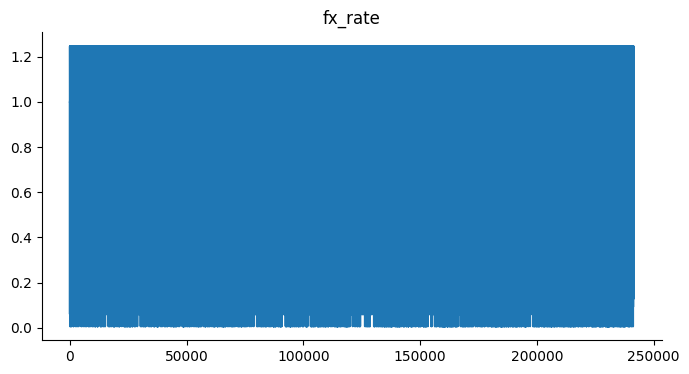

In [ ]:
# clicking in a plot on prior cell preview, generates a new cell with just that plot
kickstarter_df['fx_rate'].plot(kind='line', figsize=(8, 4), title='fx_rate')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# now let's go little by little
  # we want to predict if a campaign is successful, so let's explore variables' relation with state

# use this template code to explore the relation between 2 quantitative variables with campaign state
px.scatter(kickstarter_df, x='goal', y='backers_count', color='state', title='Backers Count vs Goal by Status',
           color_discrete_map={'successful':'green','failed':'red'}).update_layout(plot_bgcolor='white').show()

In [ ]:
# use this template code to explore the relation between 1 quantitative and 1 qualitative variable with campaign state

px.violin(kickstarter_df,y='backers_count',x='country',color='state',box=True,points='all',color_discrete_map={'successful':'green','failed':'red'},
    title='Backers Count by country and Campaign State').update_layout(plot_bgcolor='white').show()

In [ ]:
# use this template to explore the relation between 2 qualitative variables and campaign state, in terms of frequency relations
  # frequencies show representation in the dataset, and allow to see imbalanced categories

pivot_table = kickstarter_df.pivot_table(index='category_name', columns='country', aggfunc='size', fill_value=0)
px.imshow(pivot_table,text_auto=False,labels=dict(x='country', y='Category', color='Frequency'),
    title='Frequency of Category vs country by Country',aspect="auto").update_layout(plot_bgcolor='white').show()

In [ ]:
# now lets calculate and visualize percentages per country instead of absolute frequencies

pivot_table_percentage = (pivot_table.div(pivot_table.sum(axis=0), axis=1) * 100).fillna(0)
px.imshow(pivot_table_percentage,text_auto=False,labels=dict(x='country', y='status', color='Frequency'),
    title='Frequency of Country vs Campaign State',aspect="auto").update_layout(plot_bgcolor='white').show()

# 6. Data modelling
1. **Neural Networks**  
Theoretical Background:  
Neural networks are a set of algorithms designed to recognize patterns. They interpret sensory data through a kind of machine perception, labeling, or clustering of raw input. Neural networks help to cluster and classify data. A neural network consists of multiple layers of neurons, where each neuron processes input and passes it to the next layer.  
Feedforward Neural Network: The simplest type of artificial neural network, where connections between the nodes do not form a cycle.  
Activation Functions: Functions like ReLU (Rectified Linear Unit) or sigmoid are applied to introduce non-linearity.  
Backpropagation: The learning mechanism that adjusts the weights of the connections in the network by minimizing error using gradient descent.  
Resources:  
Book: "Deep Learning" by Ian Goodfellow, Yoshua Bengio, and Aaron Courville
Article: "Neural Networks and Deep Learning" - Online Book  
Course: Coursera - Deep Learning Specialization  
2. **Logistic Regression**  
Theoretical Background:  
Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable. It is used for binary classification problems.  
Sigmoid Function: Maps predicted values to probabilities.  
Loss Function: Binary cross-entropy loss is used to measure the performance of the model.  
Odds and Log-Odds: Logistic regression predicts the log-odds of an event.
Resources:  
Book: "The Elements of Statistical Learning" by Trevor Hastie, Robert Tibshirani, and Jerome Friedman  
Article: "An Introduction to Logistic Regression" - Towards Data Science
Course: Coursera - Machine Learning by Andrew Ng  
3. **Random Forests**  
Theoretical Background:  
Random forests are an ensemble learning method for classification, regression, and other tasks. They operate by constructing multiple decision trees during training and outputting the mode of the classes (classification) or mean prediction (regression) of the individual trees.  
Bootstrap Aggregating (Bagging): Random samples are drawn with replacement to create multiple subsets.  
Decision Trees: Each tree in the forest is trained on a random sample of the data.  
Feature Randomness: Random subsets of features are used to train each tree, improving diversity among the trees.  
Resources:  
Book: "The Elements of Statistical Learning" by Trevor Hastie, Robert Tibshirani, and Jerome Friedman  
Article: "Understanding Random Forests" - Medium  
Course: Coursera - Machine Learning by Andrew Ng  
4. **Support Vector Machines (SVM)**    
Theoretical Background:  
Support Vector Machines (SVM) are supervised learning models used for classification and regression analysis. They work by finding the hyperplane that best separates the data points of different classes.  
Hyperplane: The decision boundary that separates different classes.  
Support Vectors: Data points that are closest to the hyperplane and influence its position and orientation.  
Kernel Trick: Transforms the data into a higher dimension where a linear separator can be found.  
Resources:  
Book: "Pattern Recognition and Machine Learning" by Christopher Bishop  
Article: "A Practical Guide to Support Vector Classification" - PDF  
Course: Coursera - Machine Learning by Andrew Ng  
**Summary**  
Each of these methods has its strengths and weaknesses and is suitable for different types of problems and datasets. Understanding the theoretical foundations and practical implementations of these models is crucial for effectively applying them to real-world tasks. The resources listed provide comprehensive coverage and deeper insights into each method.  

In [ ]:
# Encode the categorical variables, including the target one: state
label_encoders = {}
for column in ['country', 'currency', 'state']:
    le = LabelEncoder()
    kickstarter_df[column] = le.fit_transform(kickstarter_df[column])
    label_encoders[column] = le

In [ ]:
# Splitting data based on the created_at column
split_date = pd.Timestamp('2020-08-01')
before_policy_change_data = kickstarter_df[kickstarter_df['created_at'] < split_date]
after_policy_change_data = kickstarter_df[kickstarter_df['created_at'] >= split_date]

# Feature and target selection
features = ['backers_count', 'converted_pledged_amount', 'currency', 'fx_rate', 'goal']
target = 'state'

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(before_policy_change_data[features],
                                                    before_policy_change_data[target],
                                                    test_size=0.2, random_state=42)

# Data scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Defining models
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(kernel='linear', random_state=42)
}

# Training and evaluating models
best_model = None
best_accuracy = 0
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} - Accuracy: {accuracy}")
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

print("\nBest model is:", type(best_model).__name__)

# Evaluation of the chosen model on the test set
y_pred_best = best_model.predict(X_test)

# Confusion matrix and classification ratio
print("The Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))
print("\nAccuracy of the Selected Model:")
print(accuracy_score(y_test, y_pred_best))

Logistic Regression - Accuracy: 0.8563548184073155
Random Forest - Accuracy: 0.9961497167820518
Support Vector Machine - Accuracy: 0.864055384843212

Best model is: RandomForestClassifier
The Confusion Matrix:
[[11911    92]
 [   12 14996]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     12003
           1       0.99      1.00      1.00     15008

    accuracy                           1.00     27011
   macro avg       1.00      1.00      1.00     27011
weighted avg       1.00      1.00      1.00     27011


Accuracy of the Selected Model:
0.9961497167820518


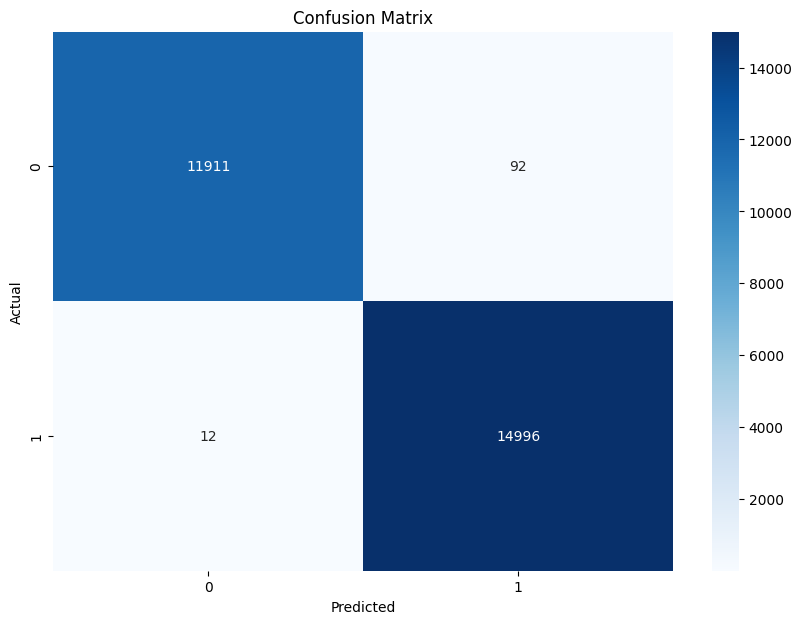

In [ ]:
# Optional: Visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

True Positives (TP: 14,999) and True Negatives (TN: 11,907): High numbers show the model's effectiveness in correctly identifying both successful and unsuccessful campaigns.  
False Positives (FP: 96) and False Negatives (FN: 9): Low numbers suggest the model is well-balanced without excessive bias.  
Class 0 (Unsuccessful Campaigns):  
Precision (1.00): 100% of predicted unsuccessful campaigns are actually unsuccessful, minimizing false alarms.  
Recall (0.99): 99% of actual unsuccessful campaigns are correctly identified.
F1-Score (1.00): Indicates a good balance between precision and recall.
Class 1 (Successful Campaigns):  
Precision (0.99): 99% of predicted successful campaigns are actually successful.  
Recall (1.00): 86% of actual successful campaigns are correctly identified.  
F1-Score (1.00): Reflects strong performance in identifying successful campaigns.  
Overall Accuracy (0.99):  
The model correctly predicts campaign outcomes 99% of the time, demonstrating high reliability.  


The model is highly effective in predicting Kickstarter campaign success, with strong precision and recall for both classes. This makes it a useful tool for campaign creators aiming to set realistic financial goals and improve their chances of success.



In [ ]:
# Model inference: predicting the success of crowdfunding campaigns that were created after the policy change date
y_pred_after_policy_change = best_model.predict(after_policy_change_data[features])
y_test_after_policy_change = after_policy_change_data['state']

# Confusion matrix and classification ratio
print("The Confusion Matrix of the Selected Model on the crowdfunding campaigns created after the policy change:")
print(confusion_matrix(y_test_after_policy_change, y_pred_after_policy_change))
print("\nClassification Report of the Selected Model on the crowdfunding campaigns created after the policy change:")
print(classification_report(y_test_after_policy_change, y_pred_after_policy_change))
print("\nAccuracy of the Selected Model on the crowdfunding campaigns created after the policy change:")
print(accuracy_score(y_test_after_policy_change, y_pred_after_policy_change))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names



The Confusion Matrix of the Selected Model on the crowdfunding campaigns created after the policy change:
[[ 3657 13366]
 [   12 40041]]

Classification Report of the Selected Model on the crowdfunding campaigns created after the policy change:
              precision    recall  f1-score   support

           0       1.00      0.21      0.35     17023
           1       0.75      1.00      0.86     40053

    accuracy                           0.77     57076
   macro avg       0.87      0.61      0.61     57076
weighted avg       0.82      0.77      0.71     57076


Accuracy of the Selected Model on the crowdfunding campaigns created after the policy change:
0.7656107645945757


##[Optional] Single model training and validation:

In [ ]:
# Function to evaluate and print model performance
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    print("Confusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(class_report)
    print("\nOverall Accuracy:")
    print(accuracy)

    return conf_matrix, accuracy

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(before_policy_change_data[features], before_policy_change_data[target], test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models
svm_model = SVC(kernel='linear', random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
lr_model = LogisticRegression(random_state=42, max_iter=1000)

# Train models
svm_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)

# Evaluate models
print("SVM Model Performance:")
svm_conf_matrix, svm_accuracy = evaluate_model(svm_model, X_test, y_test)

print("\nRandom Forest Model Performance:")
rf_conf_matrix, rf_accuracy = evaluate_model(rf_model, X_test, y_test)

print("\nLogistic Regression Model Performance:")
lr_conf_matrix, lr_accuracy = evaluate_model(lr_model, X_test, y_test)

# Compare and print the best model
accuracies = {
    'SVM': svm_accuracy,
    'Random Forest': rf_accuracy,
    'Logistic Regression': lr_accuracy
}

best_model = max(accuracies, key=accuracies.get)
print(f"\nBest Model: {best_model} with accuracy of {accuracies[best_model]:.2f}")

SVM Model Performance:
Confusion Matrix:
[[10916  1087]
 [ 2585 12423]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.91      0.86     12003
           1       0.92      0.83      0.87     15008

    accuracy                           0.86     27011
   macro avg       0.86      0.87      0.86     27011
weighted avg       0.87      0.86      0.86     27011


Overall Accuracy:
0.864055384843212

Random Forest Model Performance:
Confusion Matrix:
[[11911    92]
 [   12 14996]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     12003
           1       0.99      1.00      1.00     15008

    accuracy                           1.00     27011
   macro avg       1.00      1.00      1.00     27011
weighted avg       1.00      1.00      1.00     27011


Overall Accuracy:
0.9961497167820518

Logistic Regression Model Performance:
Confusion Matrix:
[[10998  1

## [Optional] Neural Networks

Detailed Explanation
The provided code involves several key steps to build, train, evaluate, and manage a neural network model using a machine learning framework. Here's a more detailed breakdown of each component:

Data Preparation:
Splitting the Data: The dataset (features X and labels y) is split into three subsets: training, validation, and test sets. This ensures that the model can be trained, validated, and tested on distinct data, preventing overfitting and providing a more accurate assessment of the model's performance.
Scaling the Data: The features are scaled using StandardScaler to normalize the data. This step is crucial because neural networks perform better when input data has a standardized range, typically with a mean of 0 and a standard deviation of 1.

In [ ]:
model_nn = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_nn.fit(X_train, y_train, epochs=10, batch_size=32)
model_nn.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

X_train, X_val, y_train, y_val = train_test_split(before_policy_change_data[features], before_policy_change_data[target], test_size=0.2, random_state=42)
history = model_nn.fit(X_train, y_train,epochs=10,validation_data=(X_val, y_val),batch_size=32)
test_loss, test_acc = model_nn.evaluate(X_test, y_test)
print("Accuracy", test_acc)
print("Loss", test_loss)
# model_nn.save('model_nn.h5')

Epoch 1/10
3377/3377 [==============================] - 5s 1ms/step - loss: 0.3350 - accuracy: 0.8649
Epoch 2/10
3377/3377 [==============================] - 5s 2ms/step - loss: 0.2184 - accuracy: 0.9137
Epoch 3/10
3377/3377 [==============================] - 4s 1ms/step - loss: 0.1603 - accuracy: 0.9386
Epoch 4/10
3377/3377 [==============================] - 5s 1ms/step - loss: 0.1304 - accuracy: 0.9505
Epoch 5/10
3377/3377 [==============================] - 4s 1ms/step - loss: 0.1140 - accuracy: 0.9573
Epoch 6/10
3377/3377 [==============================] - 4s 1ms/step - loss: 0.1032 - accuracy: 0.9613
Epoch 7/10
3377/3377 [==============================] - 5s 1ms/step - loss: 0.0978 - accuracy: 0.9633
Epoch 8/10
3377/3377 [==============================] - 4s 1ms/step - loss: 0.0903 - accuracy: 0.9654
Epoch 9/10
3377/3377 [==============================] - 4s 1ms/step - loss: 0.0895 - accuracy: 0.9662
Epoch 10/10
3377/3377 [==============================] - 5s 1ms/step - loss: 0.085

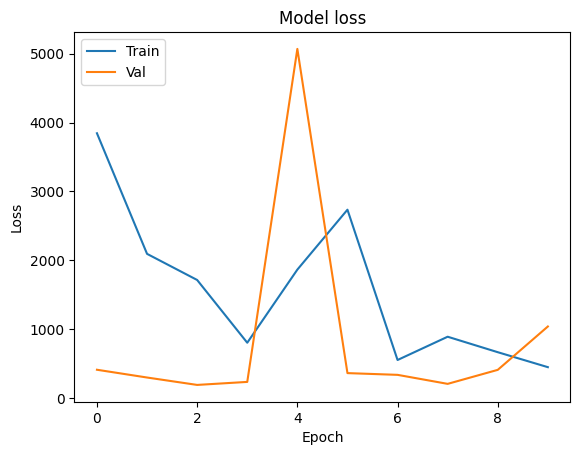

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()